In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# QUESTION 1a

The purpose of this code is to compute the centered difference approximation for $f'$ at the point $x_0 = \frac{1}{2}$.

The purpose of h_creator() is to create values for our step interval $h$ based on the formula given in the problem statement, $h = \frac{0.1}{2^{n}}$. The input parameter is $n$, which will determine the size of $h$.

In [2]:
def h_creator(n):
    h_list = []
    for k in range(n):
        h_list.append(0.1/(2**k))
    return h_list

We will compute $h$ for $n = 0,1,..., 10$

In [3]:
h_list = h_creator(10)
print(h_list)

[0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125, 0.000390625, 0.0001953125]


The purpose of x_creator is to create the "back" and "forward" nodes, $x_0 - h, x_0 + h$ given input parameter $x_0$.

In [4]:
def x_creator(x, h):
    x_list = [x]
    x_list.append(x+h)
    x_list.insert(0, x-h)
    return x_list

We will compute $x_0 - h, x_0 + h$ for $x_0 = \frac{1}{2}$, $h = \frac{1}{10}$.

In [5]:
x_creator(0.5, 0.1)

[0.4, 0.5, 0.6]

Define our function $f(x) = e^{x}$.

In [6]:
def f(x):
    return np.exp(x)

The purpose of deriv_f_approx() is to approximate $f'(x)$ according to the approximation formula $\frac{f(x_0 + h) - f(x_0 - h)}{2h}$. The input parameters are our function whose derivative is to be approximated $f$, and a list of $h$ values with which to approximate $f'$.

In [7]:
def deriv_f_approx(f, h_list):
    f_prime_list = []
    for h in h_list:
        x_list = x_creator(0.5, h)
        f_prime_list.append('Our f prime approximation for h = {0} is {1}'.format(h, (f(x_list[2]) - f(x_list[0])) / (2*h)))
    return f_prime_list

In [8]:
def deriv_f_approx2(f, h_list):
    f_prime_list = []
    for h in h_list:
        x_list = x_creator(0.5, h)
        f_prime_list.append((f(x_list[2]) - f(x_list[0])) / (2*h))
    return f_prime_list

In [9]:
deriv_f_approx(f, h_list)

['Our f prime approximation for h = 0.1 is 1.6514705137461927',
 'Our f prime approximation for h = 0.05 is 1.6494083237722634',
 'Our f prime approximation for h = 0.025 is 1.648893017866171',
 'Our f prime approximation for h = 0.0125 is 1.6487642064853247',
 'Our f prime approximation for h = 0.00625 is 1.6487320045835219',
 'Our f prime approximation for h = 0.003125 is 1.6487239541670817',
 'Our f prime approximation for h = 0.0015625 is 1.6487219415666488',
 'Our f prime approximation for h = 0.00078125 is 1.6487214384167714',
 'Our f prime approximation for h = 0.000390625 is 1.648721312629391',
 'Our f prime approximation for h = 0.0001953125 is 1.6487212811824747']

The function f_approx_error() computes the error of each of our previously computed approximations, by taking the
absolute value after subtracting the approximation from the actual value of $f'(\frac{1}{2})$

In [10]:
def f_approx_error(f, x, h_list):
    error_list = []
    f_prime_list = deriv_f_approx2(f, h_list)
    for index, h in enumerate(h_list):
        error_list.append('The error for the f prime approximation with h = {0} is {1}'.format(h, math.fabs(f_prime_list[index] - f(x))))
    return error_list

In [11]:
f_approx_error(f, 0.5, h_list)

['The error for the f prime approximation with h = 0.1 is 0.002749243046064498',
 'The error for the f prime approximation with h = 0.05 is 0.0006870530721352353',
 'The error for the f prime approximation with h = 0.025 is 0.000171747166042735',
 'The error for the f prime approximation with h = 0.0125 is 4.293578519654062e-05',
 'The error for the f prime approximation with h = 0.00625 is 1.0733883393676535e-05',
 'The error for the f prime approximation with h = 0.003125 is 2.683466953534719e-06',
 'The error for the f prime approximation with h = 0.0015625 is 6.708665205579223e-07',
 'The error for the f prime approximation with h = 0.00078125 is 1.6771664324011226e-07',
 'The error for the f prime approximation with h = 0.000390625 is 4.1929262728501726e-08',
 'The error for the f prime approximation with h = 0.0001953125 is 1.0482346546325516e-08']

In [12]:
def f_approx_error2(f, x, h_list):
    error_list = []
    f_prime_list = deriv_f_approx2(f, h_list)
    for index, h in enumerate(h_list):
        error_list.append(math.fabs(f_prime_list[index] - f(x)))
    return error_list

In [16]:
error_rate = f_approx_error2(f, 0.5, h_list)

The purpose of the function error_ratio() is to compute the ratio of the error of an approximation by the error of the approximation with the previous $h$ value.

In [17]:
def error_ratio(error_rate):
    error_ratios = []
    try:
        for index, error in enumerate(error_rate):
            error_ratios.append(error_rate[index+1] / error)
    except Exception:
        pass
    return error_ratios

Since we can see the ratios approach the value $\frac{1}{4}$, this proves the approximation has a quadratic rate of convergence, since as we divide $h$ by 2, error declines by a factor of 4 ($\mathcal{O}(h^2)$).

In [18]:
error_ratio(error_rate)

[0.2499062689705597,
 0.24997656368666865,
 0.2499941407234465,
 0.2499985348944166,
 0.24999963714116577,
 0.24999991882674122,
 0.2500000195279259,
 0.25000060768252746,
 0.25000073610166446]

# QUESTION 1b

In [19]:
x_list = x_creator(0.5, 0.1)

In [20]:
M  = np.exp(0.6)

In [21]:
# let's find optimal h_0 value based on formula from lecture notes
h_0 = ((3*np.finfo(float).eps * f(x_list[1])) / M**3)**(1/3)

In [22]:
print(h_0)

5.662300119196189e-06


Now let's approximately find the optimal $h_0$ value, by computing 1000 values of h:

In [23]:
h_list2 = h_creator(1000)

In [24]:
error_rate2 = f_approx_error2(f, 0.5, h_list2)

After plotting, we see the error rapidly increases after a certain point so let's visually examine where error is minimized in the range of $0 \leq n \leq 40$.

Text(0.5, 0, 'n value corresponding to h=0.1/2^n')

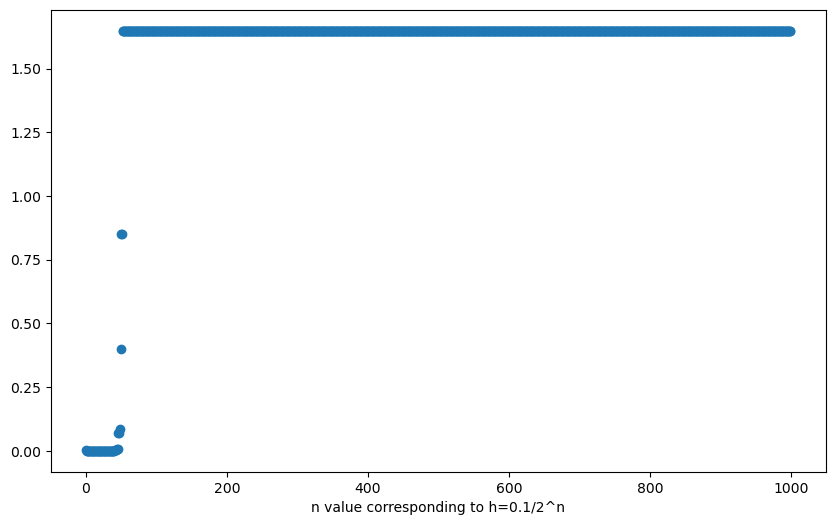

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(range(0,1000), error_rate2)
plt.xlabel('n value corresponding to h=0.1/2^n')

In [26]:
h_list3 = h_creator(40)

In [27]:
error_rate3 = f_approx_error2(f, 0.5, h_list3)

Text(0.5, 0, 'n value corresponding to h=0.1/2^n')

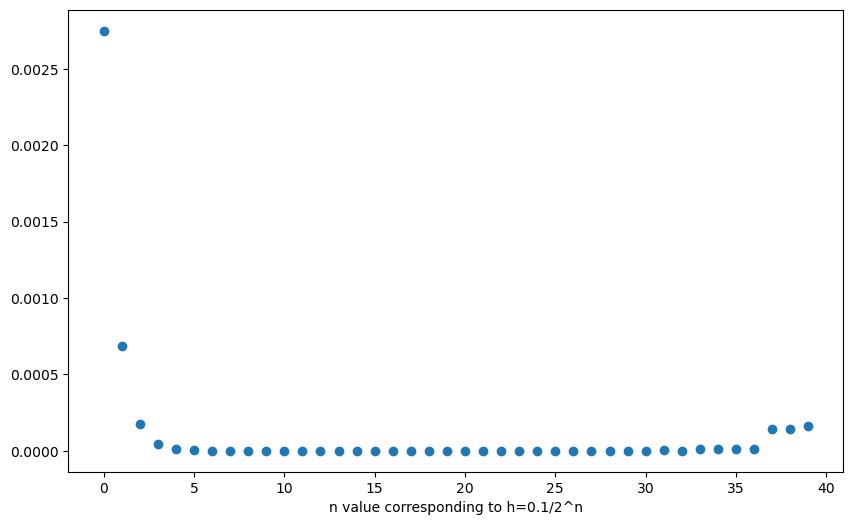

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(range(0,40), error_rate3)
plt.xlabel('n value corresponding to h=0.1/2^n')

In [30]:
h_list4 = h_list2[15:30]

In [31]:
error_rate4 = f_approx_error2(f, 0.5, h_list4)

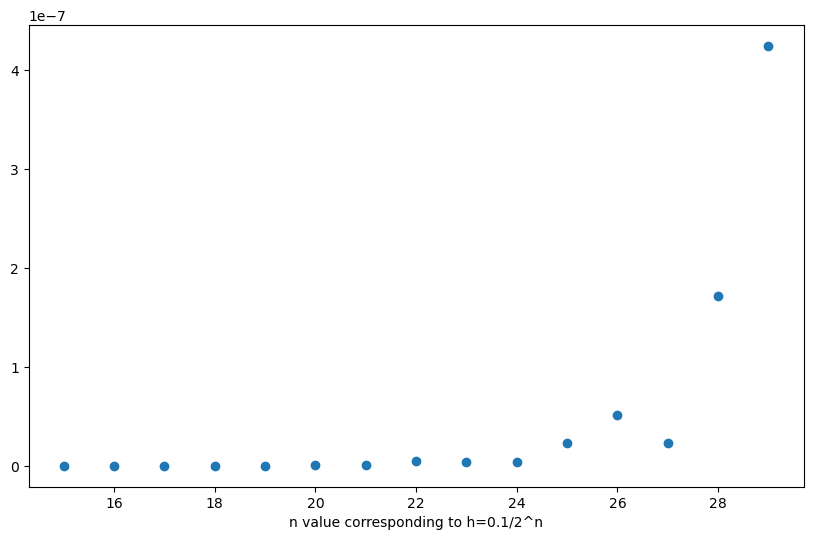

In [32]:
plt.figure(figsize=(10,6))
plt.xlabel('n value corresponding to h=0.1/2^n')
plt.scatter(range(15,30), error_rate4)

error appears to be minimized at $n=21$, corresponding to an optimal $h_0 = \frac{0.1}{2^{21}}$

In [33]:
x_list2 = x_creator(0.5, 0.1/(2**21))

Let's compute error at $h_0 = \frac{0.1}{2^{21}}$ to verify:

In [34]:
f_approx = (np.exp(x_list2[2]) - np.exp(x_list2[0])) / (2*(0.1/(2**21)))

In [35]:
error = math.fabs(f_approx - np.exp(0.5))
print(error)

4.943894182929398e-10


# QUESTION 1c

The function x_creator2 computes the values $x_0 - h, x_0 - \frac{h}{2}, x_0, x_0 + \frac{h}{2}, x_0 + h$ based on the input parameters $x_0, h$.

In [36]:
def x_creator2(x, h):
    x_list = [x]
    x_list.append(x + (h/2))
    x_list.append(x + h)
    x_list.insert(0, x - (h/2))
    x_list.insert(0, x - h)
    return x_list

The function richardsons_extrapolation computes Richardson's extrapolation of our centered difference formula as computed in the lecture notes: $\frac{-f(x_0 + h) + f(x_0 - h) + 8f(x_0 + \frac{h}{2}) - 8f(x_0 - \frac{h}{2})}{6h}$ $\newline$
The input parameters are our function $f$ whose derivative is to be approximated, and a list of $h$ values, where the approximation is calculated at each value.

In [37]:
def richardsons_extrapolation(f, h_list):
    f_prime_list = []
    for h in h_list:
        x_list = x_creator2(0.5, h)
        f_prime_list.append('Our f prime approximation for h = {0} is {1}'.format(h, ((-1*f(x_list[4]) + f(x_list[0]) + 8*f(x_list[3]) - 8*f(x_list[1])) / (6*h))))
    return f_prime_list

In [38]:
richardsons_extrapolation(f, h_list)

['Our f prime approximation for h = 0.1 is 1.6487209271142864',
 'Our f prime approximation for h = 0.05 is 1.6487212492308065',
 'Our f prime approximation for h = 0.025 is 1.6487212693583801',
 'Our f prime approximation for h = 0.0125 is 1.648721270616254',
 'Our f prime approximation for h = 0.00625 is 1.648721270694911',
 'Our f prime approximation for h = 0.003125 is 1.6487212706997902',
 'Our f prime approximation for h = 0.0015625 is 1.648721270700169',
 'Our f prime approximation for h = 0.00078125 is 1.6487212707003587',
 'Our f prime approximation for h = 0.000390625 is 1.6487212707003587',
 'Our f prime approximation for h = 0.0001953125 is 1.6487212707018744']

In [39]:
def richardsons_extrapolation2(f, h_list):
    f_prime_list = []
    for h in h_list:
        x_list = x_creator2(0.5, h)
        f_prime_list.append((-1*f(x_list[4]) + f(x_list[0]) + 8*f(x_list[3]) - 8*f(x_list[1])) / (6*h))
    return f_prime_list

In [40]:
def richardsons_approx_error(f, x, h_list):
    error_list = []
    f_prime_list = richardsons_extrapolation2(f, h_list)
    for index, h in enumerate(h_list):
        error_list.append('The error for the f prime approximation with h = {0} is {1}'.format(h, math.fabs(f_prime_list[index] - f(x))))
    return error_list

In [41]:
richardsons_approx_error(f, 0.5, h_list)

['The error for the f prime approximation with h = 0.1 is 3.435858417777382e-07',
 'The error for the f prime approximation with h = 0.05 is 2.146932165381088e-08',
 'The error for the f prime approximation with h = 0.025 is 1.341748046002067e-09',
 'The error for the f prime approximation with h = 0.0125 is 8.387424088596163e-11',
 'The error for the f prime approximation with h = 0.00625 is 5.217160037318536e-12',
 'The error for the f prime approximation with h = 0.003125 is 3.3795188869589765e-13',
 'The error for the f prime approximation with h = 0.0015625 is 4.085620730620576e-14',
 'The error for the f prime approximation with h = 0.00078125 is 2.304822999121825e-13',
 'The error for the f prime approximation with h = 0.000390625 is 2.304822999121825e-13',
 'The error for the f prime approximation with h = 0.0001953125 is 1.7461587731304462e-12']

In [42]:
def richardsons_approx_error2(f, x, h_list):
    error_list = []
    f_prime_list = richardsons_extrapolation2(f, h_list)
    for index, h in enumerate(h_list):
        error_list.append(math.fabs(f_prime_list[index] - f(x)))
    return error_list

In [43]:
error_rate5 = richardsons_approx_error2(f, 0.5, h_list)

Once again, we will compute the ratios of the error terms to show that they approach the value $\frac{1}{16}$, so as we divide $h$ by 2, the error diminishes by a factor of 16, meaning it has rate of convergence $\mathcal{0}(h^4)$. $\newline$
As we can also see, after some time, the error stops diminishing, meaning that the approximation no longer works well for $h$ values outside of a specific range.

In [44]:
error_ratio(error_rate5)

[0.06248604873450851,
 0.062496061479609066,
 0.06251117051064624,
 0.06220217294618464,
 0.06477698331630916,
 0.12089356110381078,
 5.641304347826087,
 1.0,
 7.5761078998073215]

We can use formula from lecture notes to compute optimal $h_0$ value for Richardson's Extrapolation.

In [45]:
h_0r = np.finfo(float).eps ** (1/5)
print(h_0r)

0.000740095979741405


In [46]:
error_rate6 = richardsons_approx_error2(f, 0.5, h_list2)

Also, we can approximately find the optimal value of $h_0$ by plotting the error for over 1000 values of $h$:

Text(0.5, 0, 'n value corresponding to h=0.1/2^n')

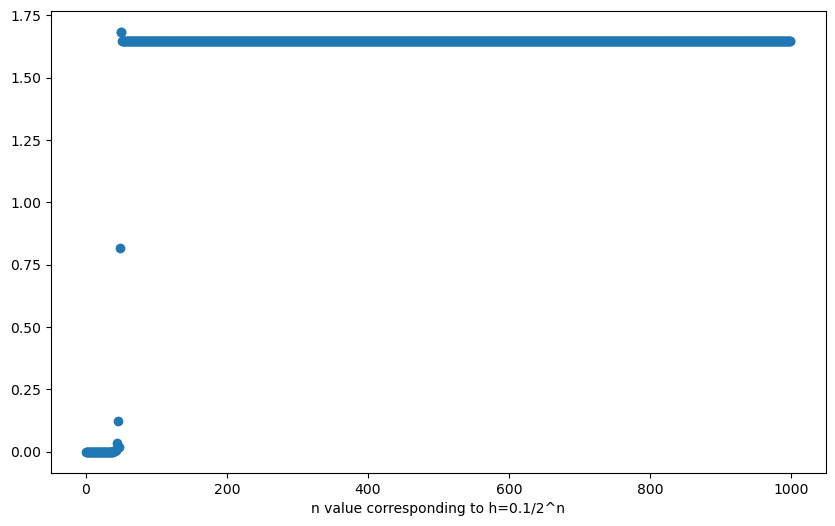

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(range(0,1000), error_rate6)
plt.xlabel('n value corresponding to h=0.1/2^n')

In [48]:
error_rate7 = richardsons_approx_error2(f, 0.5, h_list3)

Text(0.5, 0, 'n value corresponding to h=0.1/2^n')

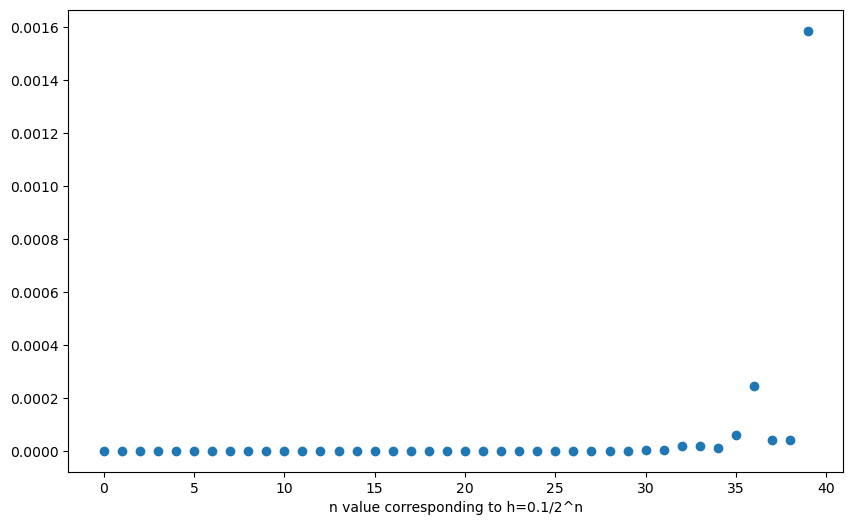

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(range(0,40), error_rate7)
plt.xlabel('n value corresponding to h=0.1/2^n')

In [50]:
h_list5 = h_list2[5:20]

In [51]:
error_rate8 = richardsons_approx_error2(f, 0.5, h_list5)

Text(0.5, 0, 'n value corresponding to h=0.1/2^n')

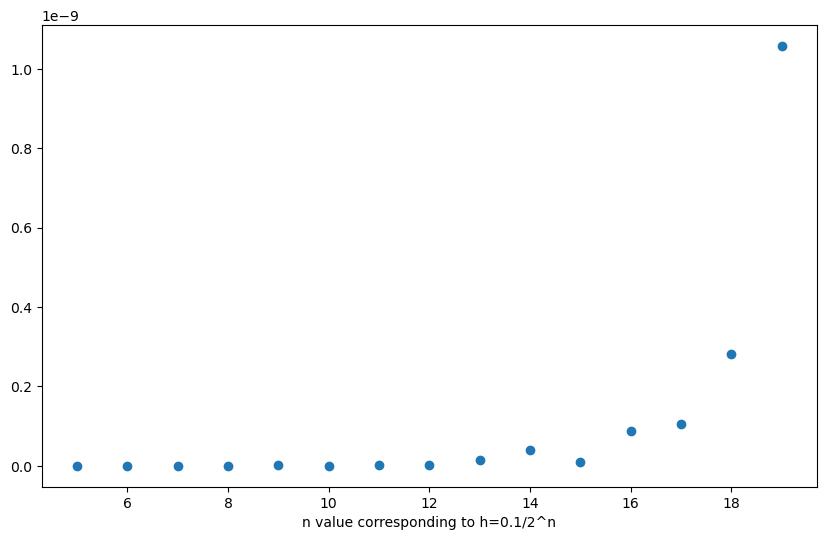

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(range(5,20), error_rate8)
plt.xlabel('n value corresponding to h=0.1/2^n')

lets choose $n=7$, corresponding to $h_0 = \frac{0.1}{2^{7}}$ as the optimal $h$ where error is minimized.